<h1>Trabalho 3 de grafos: BFS e DFS</h1>

## Autores:
    Nome:                       RA:
    Joao Augusto Leite          743551
    Caio Ueno                   743516
    Daniel Moura                743525

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
G_karate = nx.read_pajek('karate.paj') # Comeca em 1
G_dolphins = nx.read_pajek('dolphins.paj') # Comeca em 0

## Implementação

In [4]:
time = 0 # Global
def DFS(Grafo,v_inicial):
    """Faz uma busca em profundidade em um grafo"""
    G = Grafo # Para nao alterar os atributos originais do grafo
    
    nx.set_node_attributes(G,0,'d') # Tempo de entrada no vertice v
    nx.set_node_attributes(G,0,'f') # Tempo de saida no vertice v
    nx.set_node_attributes(G,'white','color') # white == v ainda nao visitado
                                              # gray == v ja visitado
                                              # black == todos os vizinhos de v ja foram visitados
    nx.set_node_attributes(G,None,'pi') # Predecessor de v

    global time
    time = 0
    
    DFS_visit(G,str(v_inicial)) # Chamada da funcao recursiva
    
    # Retorna os resultados da busca
    resultados = {}
    resultados['d'] = nx.get_node_attributes(G,'d')
    resultados['f'] = nx.get_node_attributes(G,'f') 
    resultados['color'] = nx.get_node_attributes(G,'color')
    resultados['pi'] = nx.get_node_attributes(G,'pi')
    
    T = nx.Graph() #arvore a ser retornada
    for node in G.nodes().keys(): #Criacao das arestas na arvore
        T.add_edge(node,resultados['pi'][node])
    return (pd.DataFrame(resultados),T)
    
def DFS_visit(G, u):
    """Funcao recursiva que visita todos os vizinhos de um vertice"""
    global time
    time += 1
    
    G.node[str(u)]['d'] = time # Tempo de entrada em v
    G.node[str(u)]['color'] = 'gray' # Marca u como visitado
    
    for v in nx.neighbors(G,str(u)):              # Itera sobre os vizinhos de u
        if G.node[str(v)]['color'] == 'white':    # Se v ainda nao foi visitado
            G.node[str(v)]['pi'] = str(u)
            DFS_visit(G,str(v))
    
    G.node[str(u)]['color'] = 'black' # Marca u como 'toda vizinhança ja foi visitada'
    
    time += 1
    
    G.node[str(u)]['f'] = time # Tempo de saida em v
    
def BFS(G,v_inicial):
    """Faz uma busca em largura em um grafo"""
    nx.set_node_attributes(G,np.inf,'lambda') # Menor distancia do vertice v ate a raiz
    nx.set_node_attributes(G,'white','color') # white == v ainda nao visitado
                                              # gray == v ja visitado
                                              # black == todos os vizinhos de v ja foram visitados
    nx.set_node_attributes(G,None,'pi') # predecessor de v
    
    G.node[str(v_inicial)]['color'] = 'gray'
    G.node[str(v_inicial)]['lambda'] = 0
    G.node[str(v_inicial)]['pi'] = None
    fila = []
    
    fila.append(str(v_inicial))
    
    while(len(fila) != 0):
        u = fila.pop()
        for v in nx.neighbors(G,str(u)): # Itera sobre os vizinhos de u
            if G.node[str(v)]['color'] == 'white':
                G.node[str(v)]['lambda'] = G.node[str(u)]['lambda'] + 1 
                G.node[str(v)]['pi'] = str(u)
                G.node[str(v)]['color'] = 'gray'
                fila.append(str(v))
        G.node[str(u)]['color'] = 'black'
        
    # Retorna os resultados da busca
    resultados = {}
    resultados['pi'] = nx.get_node_attributes(G,'pi')
    resultados['lambda'] = nx.get_node_attributes(G,'lambda') 
    resultados['color'] = nx.get_node_attributes(G,'color')
    
    T = nx.Graph() # arvore a ser retornada
    for node in G.nodes().keys(): # Criacao das arestas na arvore
        T.add_edge(node,resultados['pi'][node])
    return (pd.DataFrame(resultados),T)
    

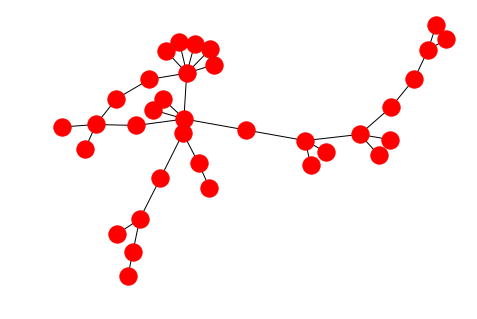

In [5]:
# Rodando o algoritmo para cada grafo
# Karate
(dfs_karate,T1) = DFS(G_karate,1)
if nx.is_tree(T1):
    nx.draw(T1)
    plt.show() # display

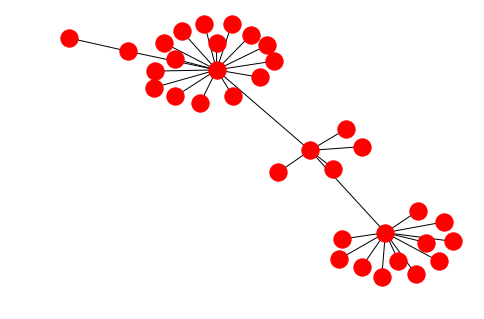

In [6]:
(bfs_karate,T2) = BFS(G_karate,1)
if nx.is_tree(T2):
    nx.draw(T2)
    plt.show()

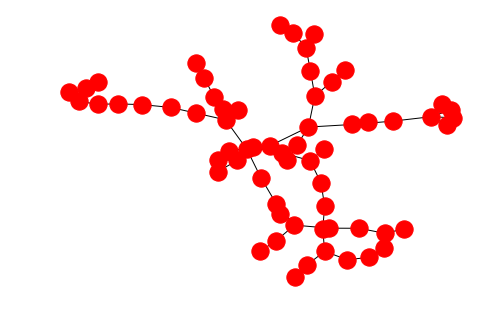

In [7]:
(dfs_dolphins,T3) = DFS(G_dolphins,0)
if nx.is_tree(T3):
    nx.draw(T3)
    plt.show()

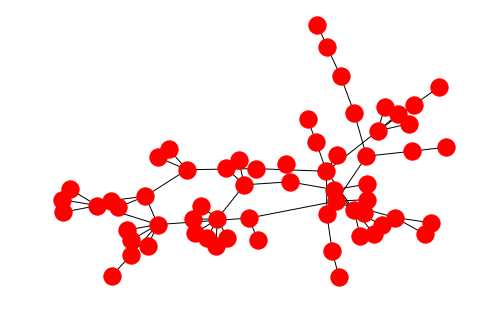

In [8]:
(bfs_dolphins,T4) = BFS(G_dolphins,0)
if nx.is_tree(T4):
    nx.draw(T4)
    plt.show()

In [9]:
dfs_karate

,d,f,color,pi
1,1,68,black,None
10,43,44,black,34
11,59,60,black,6
12,66,67,black,1
13,7,8,black,4
14,9,48,black,4
15,14,15,black,33
16,16,17,black,33
17,61,62,black,6
18,51,52,black,2


In [10]:
bfs_karate

,pi,lambda,color
1,None,0,black
10,34,3,black
11,1,1,black
12,1,1,black
13,1,1,black
14,1,1,black
15,34,3,black
16,34,3,black
17,7,2,black
18,1,1,black


In [11]:
dfs_dolphins

,d,f,color,pi
0,1,124,black,None
1,8,117,black,19
10,2,123,black,0
11,61,62,black,51
12,29,30,black,33
13,13,100,black,5
14,26,85,black,3
15,33,80,black,18
16,27,84,black,14
17,9,116,black,1


In [12]:
bfs_dolphins

,pi,lambda,color
0,None,0,black
1,19,4,black
10,0,1,black
11,51,11,black
12,33,12,black
13,54,5,black
14,0,1,black
15,0,1,black
16,50,11,black
17,57,6,black
